# Student Score Prediction #


### Import packages needed ###

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Choose features and target ###

In [2]:
student_data = pd.read_csv('StudentPerformanceFactors.csv')
student_data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
student_data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


### Data Cleaning ###

In [5]:
student_data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [6]:
student_data[['Hours_Studied', 'Exam_Score']].dropna(inplace=True)
student_data.reset_index(drop=True)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [7]:
# Check for duplicate entries
student_data.duplicated().sum()

# Remove duplicate entries if any
if(student_data.duplicated().sum() > 0):
    student_data.drop_duplicates(inplace=True)
    student_data.reset_index(drop=True)

In [8]:
# Handle Outliers using Z-score method
numeric_df = student_data.select_dtypes(include=['number'])

z_score = np.abs((numeric_df - numeric_df.mean()) / numeric_df.std())
student_data_cleaned = student_data[(z_score < 3).all(axis=1)]

student_data_cleaned.reset_index(drop=True)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6501,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6502,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6503,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6504,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


### Visualizing Current Data ###

Text(0, 0.5, 'Exam Score')

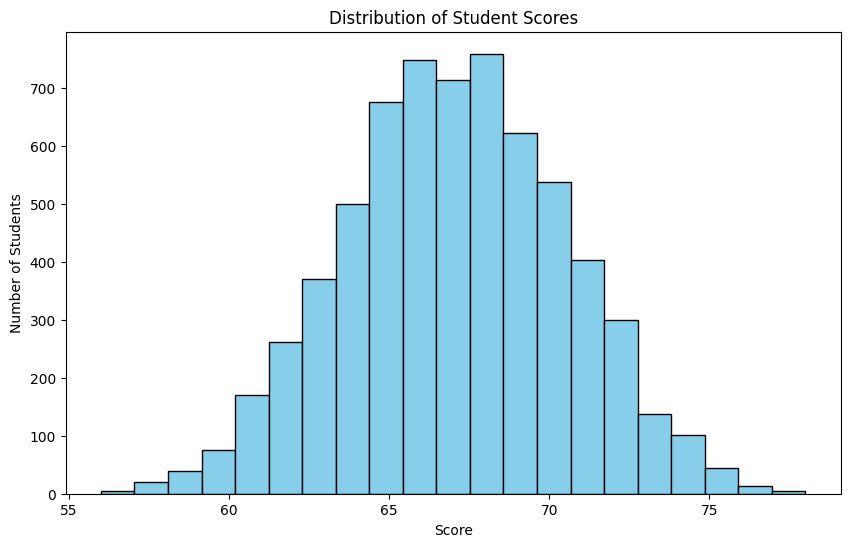

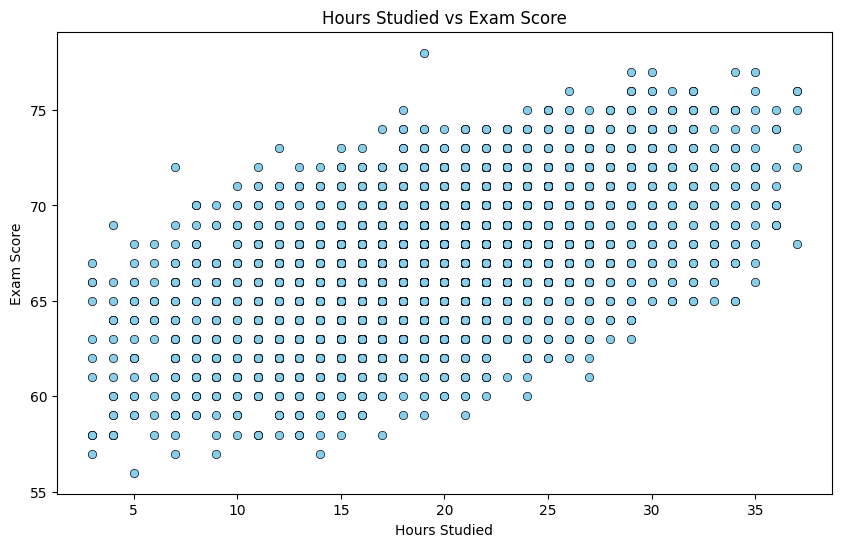

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(student_data_cleaned['Exam_Score'], bins=21, color='skyblue', edgecolor='black')
plt.title('Distribution of Student Scores')
plt.xlabel('Score')
plt.ylabel('Number of Students')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=student_data_cleaned['Hours_Studied'], y=student_data_cleaned['Exam_Score'], color='skyblue', edgecolor='black')
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')

### Build the model ###

In [10]:
# Choose feature and target variable
student_features = ['Hours_Studied']
X = student_data[student_features]
y = student_data[['Exam_Score']]

In [11]:
# Split the data into training and testing sets, train the model, and evaluate it
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 10.85592128879332
R^2 Score: 0.2319868674542106


Text(0, 0.5, 'Predicted Scores')

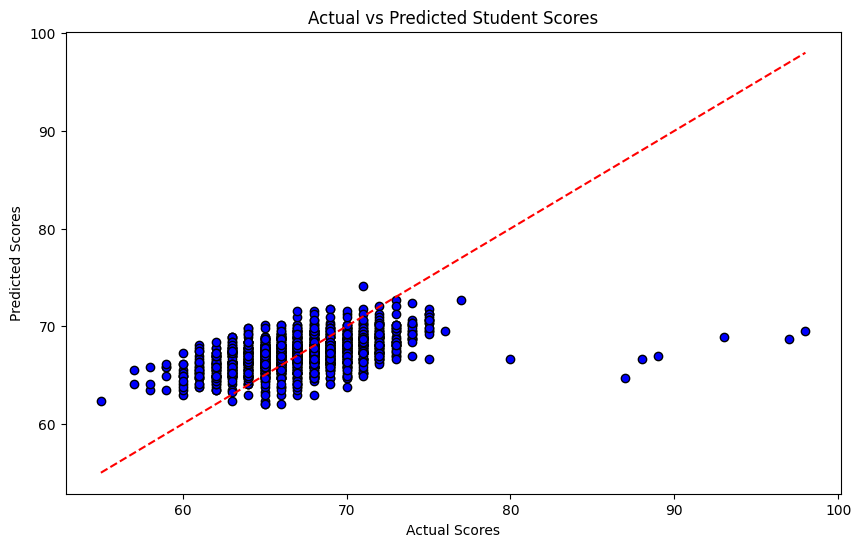

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Student Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


model_poly = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear_regression', LinearRegression())
])

model_poly.fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Model Mean Squared Error: {mse_poly}")
print(f"Polynomial Model R^2 Score: {r2_poly}")

Polynomial Model Mean Squared Error: 10.844988135705009
Polynomial Model R^2 Score: 0.23276034442853477


Text(0, 0.5, 'Polynomial Predicted Scores')

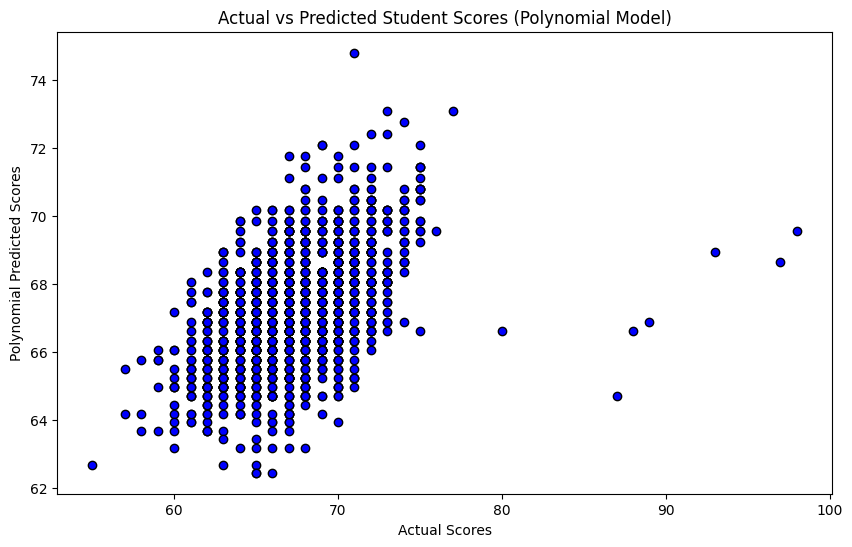

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='blue', edgecolor='black')
plt.title('Actual vs Predicted Student Scores (Polynomial Model)')
plt.xlabel('Actual Scores')
plt.ylabel('Polynomial Predicted Scores')

### Add other features ###

In [15]:
# Adding other features to improve the model
additional_features = ['Attendance', 'Previous_Scores']
X = np.hstack((student_data[student_features], student_data[additional_features]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 5.338274436557907
R^2 Score: 0.6223383752199567


Text(0, 0.5, 'Predicted Scores')

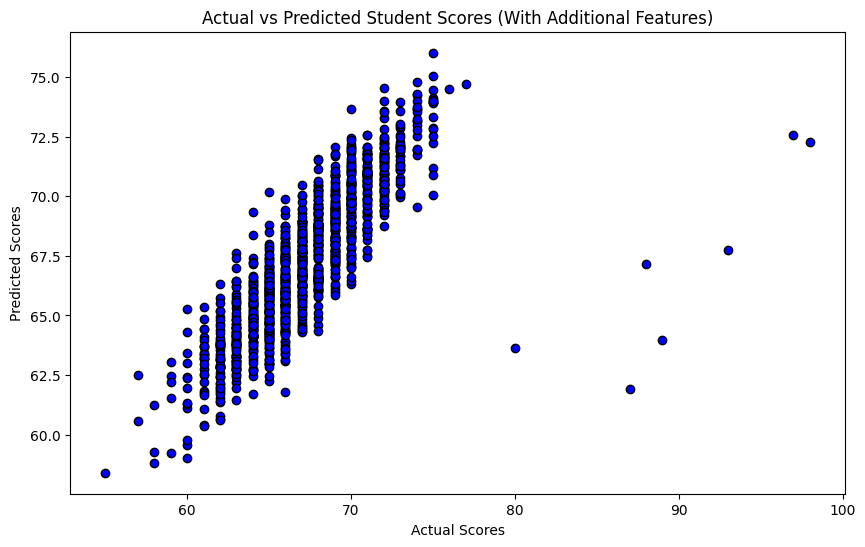

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black')
plt.title('Actual vs Predicted Student Scores (With Additional Features)')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')

In [17]:
model_poly.fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Model Mean Squared Error: {mse_poly}")
print(f"Polynomial Model R^2 Score: {r2_poly}")

Polynomial Model Mean Squared Error: 5.341410122018849
Polynomial Model R^2 Score: 0.6221165379802172


Text(0, 0.5, 'Polynomial Predicted Scores')

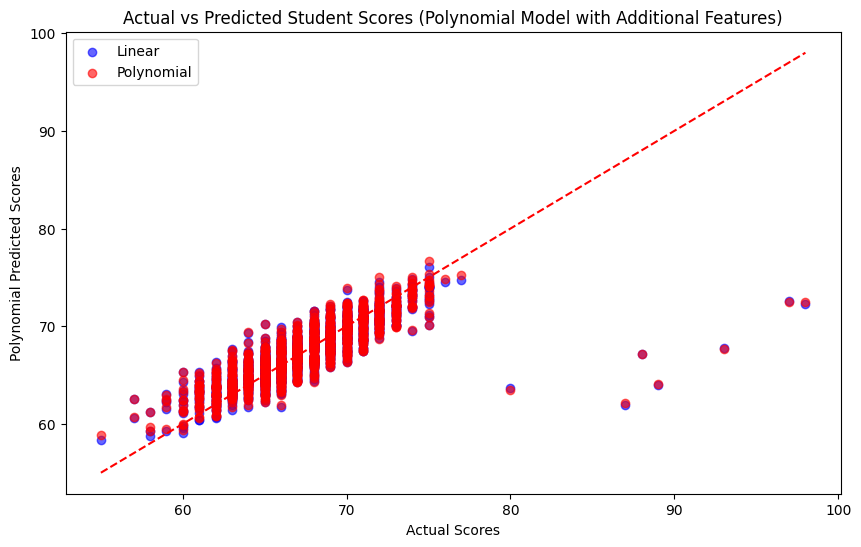

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Linear", color="blue")
plt.scatter(y_test, y_pred_poly, alpha=0.6, label="Polynomial", color="red")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Student Scores (Polynomial Model with Additional Features)')
plt.xlabel('Actual Scores')
plt.ylabel('Polynomial Predicted Scores')

### Put all features ###

In [19]:
#encode all features except the target feature
from sklearn.calibration import LabelEncoder

cat_cols = student_data_cleaned.select_dtypes(include=['object']).columns.tolist()
encoder = LabelEncoder()
for column in cat_cols:
    student_data_cleaned[column] = encoder.fit_transform(student_data_cleaned[column])

student_data_cleaned.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


In [20]:
X = student_data_cleaned.drop('Exam_Score', axis=1)
y = student_data_cleaned['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1.2366384214720116
R^2 Score: 0.8819839291856061


Text(0, 0.5, 'Predicted Scores')

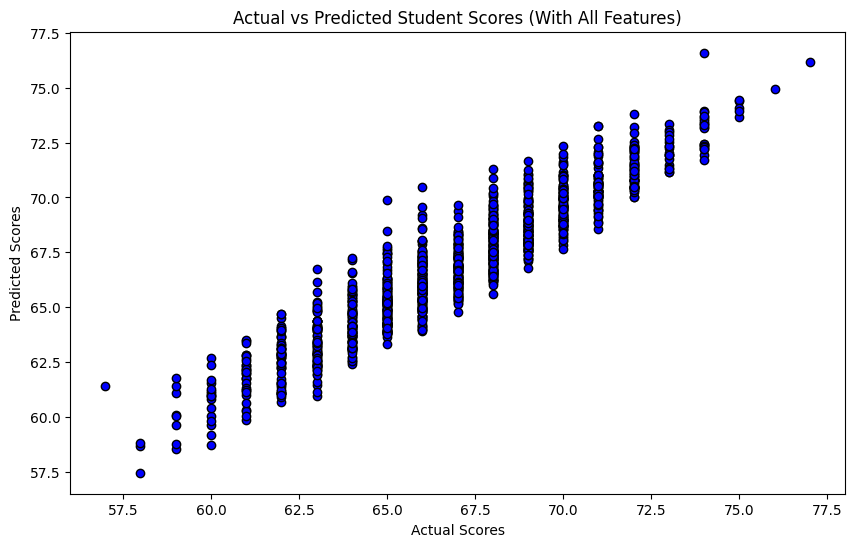

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black')
plt.title('Actual vs Predicted Student Scores (With All Features)')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')

In [22]:
model_poly.fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Model Mean Squared Error: {mse_poly}")
print(f"Polynomial Model R^2 Score: {r2_poly}")

Polynomial Model Mean Squared Error: 0.2004149737627767
Polynomial Model R^2 Score: 0.9808738048849406


Text(0, 0.5, 'Polynomial Predicted Scores')

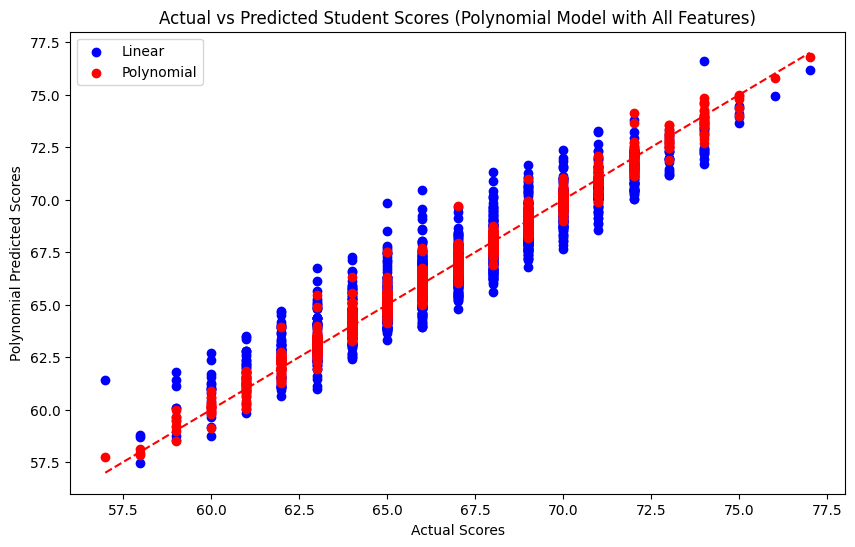

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="Linear", color="blue")
plt.scatter(y_test, y_pred_poly, label="Polynomial", color="red")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Student Scores (Polynomial Model with All Features)')
plt.xlabel('Actual Scores')
plt.ylabel('Polynomial Predicted Scores')